In [1]:
using SCIP, IPG, Plots
using IPG.JuMP

In [2]:
X1 = Model()
@variable(X1, x1, start=10.0)
@constraint(X1, x1 >= 0)

X2 = Model()
@variable(X2, x2, start=10.0)
@constraint(X2, x2 >= 0)

function player_payoff(x_self, x_other)
    return -x_self * x_self + x_self * x_other
end

players = [
    Player(X1, player_payoff(x1, x2)),
    Player(X2, player_payoff(x2, x1))
]

2-element Vector{Player{QuadExpr}}:
 Player{QuadExpr}(A JuMP Model
├ solver: none
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 1
├ num_constraints: 1
│ └ AffExpr in MOI.GreaterThan{Float64}: 1
└ Names registered in the model
  └ :x1, -x1² + x1*x2)
 Player{QuadExpr}(A JuMP Model
├ solver: none
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 1
├ num_constraints: 1
│ └ AffExpr in MOI.GreaterThan{Float64}: 1
└ Names registered in the model
  └ :x2, -x2² + x2*x1)

In [3]:
pure_profile = Dict(
    # players[1] => [10.0],
    players[2] => [1.0],
)

payoff(players[1], [5.0], pure_profile)

-20.0

In [4]:
Σ, payoff_improvements = IPG.SGM(players, SCIP.Optimizer, max_iter=100, verbose=true);

ErrorException: type Player has no field p

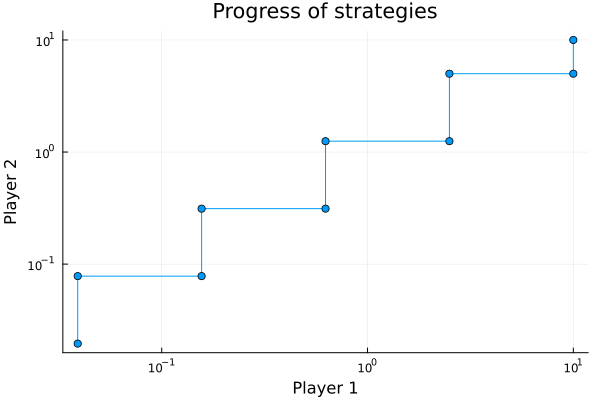

In [4]:
p1_strategies = [expected_value(identity, σk[1])[1] for σk in Σ]
p2_strategies = [expected_value(identity, σk[2])[1] for σk in Σ]

plot(p1_strategies, p2_strategies, marker=:c, title="Progress of strategies", legend=false)
plot!(xscale=:log10, yscale=:log10)
# xlims!(0,10.2)
# ylims!(0,10.2)
xlabel!("Player 1")
ylabel!("Player 2")

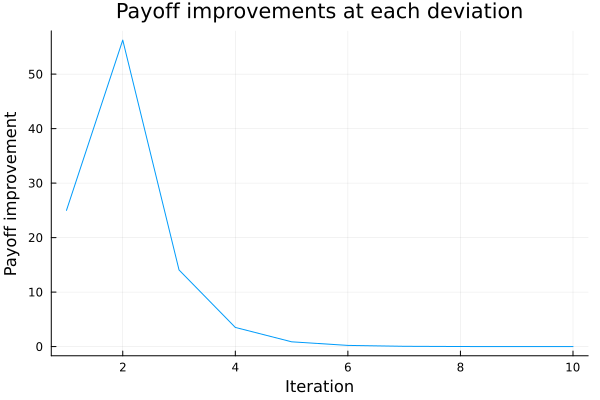

In [5]:
plot([improvement for (p, improvement) in payoff_improvements], title="Payoff improvements at each deviation", legend=false)
ylabel!("Payoff improvement")
xlabel!("Iteration")

## Customization

In [6]:
IPG.get_player_order = IPG.get_player_order_fixed_descending

get_player_order_fixed_descending (generic function with 1 method)

In [7]:
X1 = Model()
@variable(X1, x1, start=10.0)
@constraint(X1, x1 >= 0)

X2 = Model()
@variable(X2, x2, start=10.0)
@constraint(X2, x2 >= 0)

players = [
    Player(X1, BlackBoxPayoff(player_payoff), 1),
    Player(X2, BlackBoxPayoff(player_payoff), 2)
]

Σ, payoff_improvements = IPG.SGM(players, SCIP.Optimizer, max_iter=100);

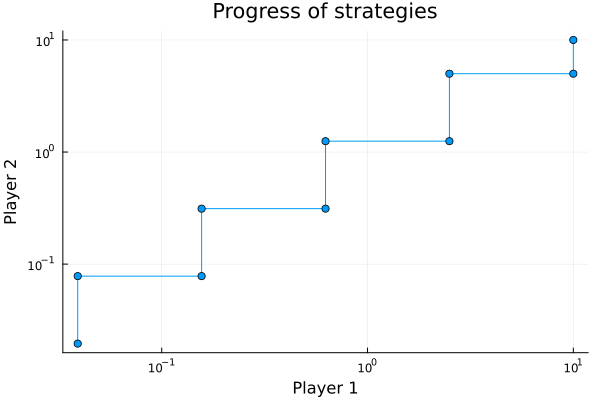

In [8]:
p1_strategies = [expected_value(identity, σk[1])[1] for σk in Σ]
p2_strategies = [expected_value(identity, σk[2])[1] for σk in Σ]

plot(p1_strategies, p2_strategies, marker=:c, title="Progress of strategies", legend=false)
plot!(xscale=:log10, yscale=:log10)
# xlims!(0,10.2)
# ylims!(0,10.2)
xlabel!("Player 1")
ylabel!("Player 2")

In [ ]:
using Random

function get_player_random_order(players::Vector{<:Player}, iter::Integer, Σ_S::Vector{Vector{DiscreteMixedStrategy}}, payoff_improvements::Vector{<:Tuple{<:Integer,<:Real}})
    return shuffle(keys(players))
end

IPG.get_player_order = get_player_random_order

get_player_random_order (generic function with 1 method)

In [10]:
X1 = Model()
@variable(X1, x1, start=10.0)
@constraint(X1, x1 >= 0)

X2 = Model()
@variable(X2, x2, start=10.0)
@constraint(X2, x2 >= 0)

players = [
    Player(X1, BlackBoxPayoff(player_payoff), 1),
    Player(X2, BlackBoxPayoff(player_payoff), 2)
]

Σ, payoff_improvements = IPG.SGM(players, SCIP.Optimizer, max_iter=100);

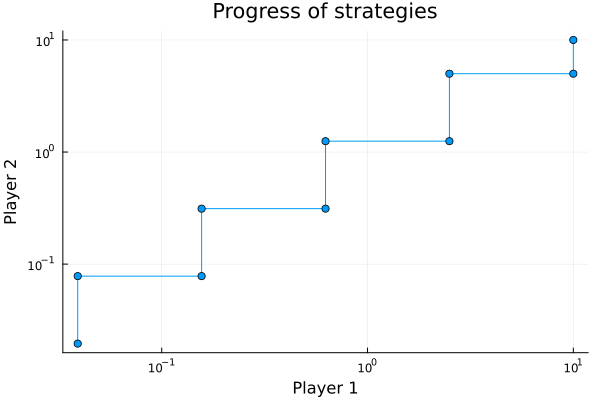

In [11]:
p1_strategies = [σk[1].supp[1][1] for σk in Σ]
p2_strategies = [σk[2].supp[1][1] for σk in Σ]

plot(p1_strategies, p2_strategies, marker=:c, title="Progress of strategies", legend=false)
plot!(xscale=:log10, yscale=:log10)
# xlims!(0,10.2)
# ylims!(0,10.2)
xlabel!("Player 1")
ylabel!("Player 2")

In [12]:
IPG.get_player_order = IPG.get_player_order_fixed_ascending
IPG.initialize_strategies = IPG.initialize_strategies_player_alone
IPG.solve = IPG.solve_Sandholm1

solve_Sandholm1 (generic function with 1 method)

In [13]:
X1 = Model()
@variable(X1, x1)
@constraint(X1, x1 >= 0)

X2 = Model()
@variable(X2, x2, start=10.0)
@constraint(X2, x2 >= 0)

players = [
    Player(X1, BlackBoxPayoff(player_payoff), 1),
    Player(X2, BlackBoxPayoff(player_payoff), 2)
]

Σ, payoff_improvements = IPG.SGM(players, SCIP.Optimizer, max_iter=100);

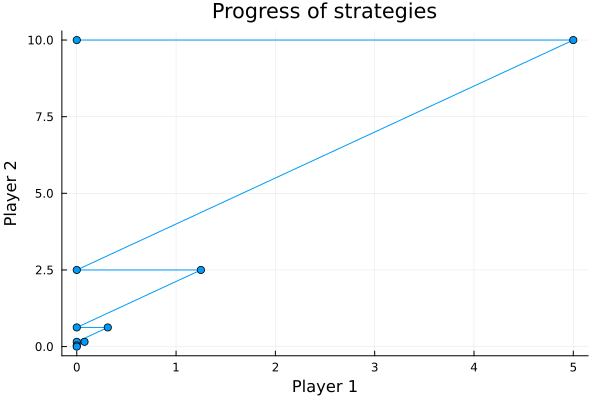

In [14]:
p1_strategies = [expected_value(identity, σk[1])[1] for σk in Σ]
p2_strategies = [expected_value(identity, σk[2])[1] for σk in Σ]

plot(p1_strategies, p2_strategies, marker=:c, title="Progress of strategies", legend=false)
# plot!(yscale=:log10)
# xlims!(0,10.2)
# ylims!(0,10.2)
xlabel!("Player 1")
ylabel!("Player 2")

In [15]:
X1 = Model()
@variable(X1, x1)
@constraint(X1, x1 >= 0)

X2 = Model()
@variable(X2, x2, start=10.0)
@constraint(X2, x2 >= 0)

players = [
    Player(X1, BlackBoxPayoff(player_payoff), 1),
    Player(X2, BlackBoxPayoff(player_payoff), 2),
    Player(copy(X2), BlackBoxPayoff(player_payoff), 3)
]

Σ, payoff_improvements = IPG.SGM(players, SCIP.Optimizer, max_iter=100);

AssertionError: AssertionError: Cannot build polymatrix for more than two players unless their payoffs are bilatera (see `BilateralPayoff`)